# Exploring Dandiset 001359: Multimodal Patch-seq Data from Human Neurons

_Notebook generated with the assistance of AI. Please review code and results carefully before drawing conclusions or publishing._

This notebook introduces and explores [Dandiset 001359](https://dandiarchive.org/dandiset/001359/0.250401.1603) – a rich, multimodal resource for studying human neuron cell types using Patch-seq recordings.

## About this notebook
The purpose of this notebook is to:
- Provide an overview of what is in Dandiset 001359.
- Demonstrate how to load, summarize, and visualize its data using the DANDI API, PyNWB, and Matplotlib.
- Help researchers get started with reanalysis of these data, including extracting metadata, epochs, and spikes.

This notebook is **read-only**: all code loads data via remote streaming, so no files are downloaded. Explanations and code are aligned closely to best practices and actual data structure seen in this dataset.

---

## What this notebook covers
1. **Dandiset and dataset structure overview**
2. **Summary of the file layout using the DANDI API**
3. **Inspection of a representative NWB file**
4. **Visual exploration:**  
   - Acquisition sweeps (current/voltage clamp)
   - Stimulus series
   - Detected spikes
   - Epoch (interval) annotation
5. **Interpretive summaries** to help plan analysis and reproducible workflows

---

## Required packages
- dandi
- pynwb
- remfile
- h5py
- matplotlib
- pandas
- numpy

(Assumed installed and importable)

## 1. Dandiset Overview and Context

- **Dandiset 001359**: "20250331_AIBS_Patchseq_human"
- [View on the DANDI Archive](https://dandiarchive.org/dandiset/001359/0.250401.1603)
- **Species:** Human (_Homo sapiens_)
- **Subjects:** 33 unique donors
- **NWB files:** 391
- **Techniques:** Patch-seq (electrophysiology + RNA), current and voltage clamp, deep metadata
- **Size:** ~23.8 GB
- **License:** CC-BY-4.0

The Dandiset enables detailed multimodal and protocol-based reanalysis, supporting:
- Classification of human neuronal cell types
- Cross-modal correlation: electrophysiology, transcriptomics, morphology
- Benchmarking, feature extraction, and cell physiology meta-analysis

---

## 2. Dandiset File Layout: Using the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient
import os

# Connect to DANDI Archive and list NWB file organization.
dandiset_id = "001359"
dandiset_version = "0.250401.1603"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

assets = list(dandiset.get_assets_by_glob("*.nwb"))
paths = [asset.path for asset in assets]

# Summarize unique subject folders
subjects = set()
for p in paths:
    parts = p.split(os.sep)
    if len(parts) > 0 and parts[0].startswith('sub-'):
        subjects.add(parts[0])
print(f"Total NWB files: {len(paths)}")
print(f"Unique subjects: {len(subjects)}")
print("\nSample NWB file paths:")
for p in paths[:10]:
    print("-", p)

Total NWB files: 391
Unique subjects: 33

Sample NWB file paths:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213430531_icephys.nwb
- sub-1211237280/sub-1211237280_ses-1211340847_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213420947_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213591749_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213661643_icephys.nwb


**Structure notes:**
- All files are organized by subject (`sub-<ID>` directories).
- Each file name encodes subject and session, e.g.:
  ```
  sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
  ```
- Each session corresponds to a different electrophysiology recording.

## 3. Inspecting a Representative NWB File

We'll choose one NWB file, stream its contents, and take a systematic look at its structure and metadata:

- **Electrophysiological sweeps:** CurrentClampSeries, VoltageClampSeries
- **Stimulus series:** For each sweep
- **Spike detection:** Spikes detected per sweep
- **Experimental intervals (epochs)**

*Note: Data are streamed directly using `remfile` (no download needed).*

In [2]:
import pynwb
import h5py
import remfile

# Select a file to inspect
nwb_path = "sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb"
asset = next(dandiset.get_assets_by_glob(nwb_path))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Display selected session and subject metadata
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Institution:", nwb.institution)
print("Subject ID:", nwb.subject.subject_id)
print("Subject Sex:", nwb.subject.sex)
print("Subject Age:", nwb.subject.age)
print("Species:", nwb.subject.species)
print("\nAcquisition data keys (first 7):", list(nwb.acquisition.keys())[:7])

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: PLACEHOLDER
Session start time: 2022-09-07 17:13:04.880000+00:00
Institution: Allen Institute for Brain Science
Subject ID: 1203384279
Subject Sex: M
Subject Age: P21170.0D
Species: Homo sapiens

Acquisition data keys (first 7): ['data_00000_AD0', 'data_00001_AD0', 'data_00002_AD0', 'data_00003_AD0', 'data_00004_AD0', 'data_00005_AD0', 'data_00006_AD0']


### 3.1. Exploring Acquisition Sweep Types and Spike Detection
We'll summarize the number of each type of sweep and examine spike-detected sweeps.

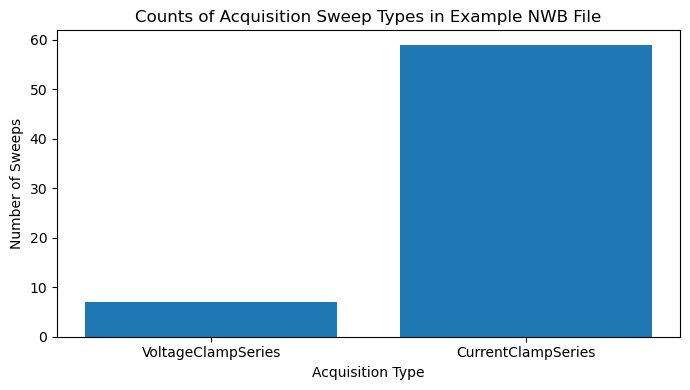

Total acquisition sweeps: 66
Sweep type counts: {'VoltageClampSeries': 7, 'CurrentClampSeries': 59}
Number of sweeps with detected spikes: 14
Total detected spikes (all sweeps): 431


In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Count sweep types
acq_types = [type(obj).__name__ for obj in nwb.acquisition.values()]
type_counts = Counter(acq_types)

# Spike detection counting
if 'spikes' in nwb.processing:
    spikes = nwb.processing['spikes']
    spike_sweep_counts = [(name, len(ifc.data[:])) for name, ifc in spikes.data_interfaces.items()]
    num_sweeps_with_spikes = sum(n > 0 for _, n in spike_sweep_counts)
    total_detected_spikes = sum(n for _, n in spike_sweep_counts)
else:
    spike_sweep_counts = []
    num_sweeps_with_spikes = 0
    total_detected_spikes = 0

# Plot the count of each acquisition type
plt.figure(figsize=(7, 4))
plt.bar(type_counts.keys(), type_counts.values())
plt.xlabel('Acquisition Type')
plt.ylabel('Number of Sweeps')
plt.title('Counts of Acquisition Sweep Types in Example NWB File')
plt.tight_layout()
plt.show()

print(f"Total acquisition sweeps: {len(nwb.acquisition)}")
print("Sweep type counts:", dict(type_counts))
print(f"Number of sweeps with detected spikes: {num_sweeps_with_spikes}")
print(f"Total detected spikes (all sweeps): {total_detected_spikes}")

- Most sweeps are **CurrentClampSeries**.
- Both current- and voltage-clamp modalities are present.
- Spike detection results are supplied for specific sweeps.

## 4. Visualizing Example Electrophysiological Data

Let's visualize a full current clamp sweep along with its stimulus, and then show how detected spikes are annotated and aligned, with correct timing correction.

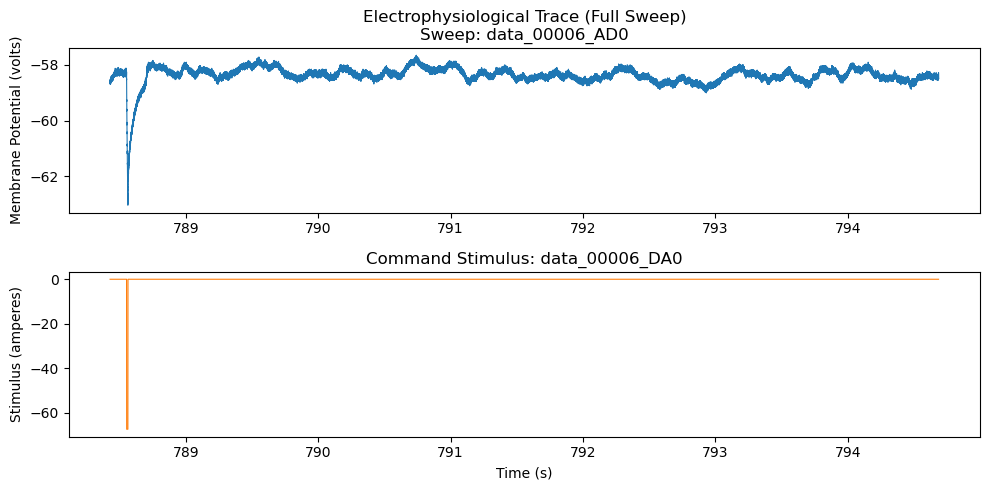

In [4]:
import numpy as np

# Select first CurrentClampSeries sweep and corresponding stimulus
cc_sweeps = [(name, obj) for name, obj in nwb.acquisition.items() if type(obj).__name__ == 'CurrentClampSeries']
example_sweep_name, example_sweep = cc_sweeps[0]
stim_name = example_sweep_name.replace('_AD0', '_DA0')
example_stimulus = nwb.stimulus.get(stim_name)

# Full sweep
trace = example_sweep.data[:]
stim = example_stimulus.data[:] if example_stimulus is not None else None
n_samples = len(trace)
rate = example_sweep.rate
start_time = example_sweep.starting_time
t = np.arange(n_samples) / rate + start_time

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, trace, color='tab:blue', linewidth=0.8)
plt.ylabel(f"Membrane Potential ({example_sweep.unit})")
plt.title(f"Electrophysiological Trace (Full Sweep)\nSweep: {example_sweep_name}")

plt.subplot(2, 1, 2)
if stim is not None:
    plt.plot(t, stim, color='tab:orange', linewidth=0.8)
    plt.ylabel(f"Stimulus ({example_stimulus.unit})")
    plt.title(f"Command Stimulus: {stim_name}")
else:
    plt.text(0.1, 0.5, 'No corresponding stimulus found', ha='left', va='center', transform=plt.gca().transAxes)
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

### 4.1. Visualizing Detected Spike Times (with Sweep Time Correction)

Many spike train arrays in this dataset are relative to sweep onset and require an offset (+0.25 seconds) for true alignment.

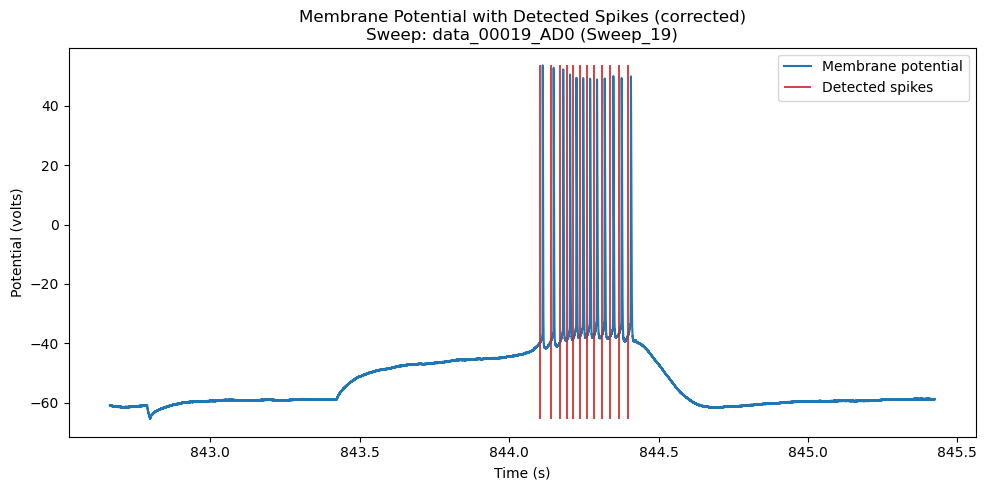

Sweep name: data_00019_AD0
Number of detected spikes: 12
First 10 corrected spike times (in seconds): [844.10260003 844.13902003 844.17100003 844.19372003 844.21516003
 844.23768003 844.26090003 844.28398003 844.30972003 844.33866003]


In [5]:
# Search for first sweep with spikes
spike_mod = nwb.processing['spikes']
sweep_with_spikes = None
for name, ts in spike_mod.data_interfaces.items():
    if hasattr(ts, 'data') and len(ts.data[:]) > 0:
        sweep_with_spikes = (name, ts)
        break

if sweep_with_spikes:
    sweep_name, spike_ts = sweep_with_spikes
    swnum = int(sweep_name.replace('Sweep_', ''))
    match = [(nm, obj) for nm, obj in nwb.acquisition.items()
             if hasattr(obj, 'sweep_number') and obj.sweep_number == swnum]
    if match:
        acq_name, acq_obj = match[0]
        trace = acq_obj.data[:]
        rate = acq_obj.rate
        start_time = acq_obj.starting_time
        t = np.arange(len(trace)) / rate + start_time
        # IMPORTANT: correct spike times for display
        spike_times = spike_ts.data[:] + start_time + 0.25
        not_nan = ~np.isnan(trace)
        trace_min = np.min(trace[not_nan]) if np.any(not_nan) else -70
        trace_max = np.max(trace[not_nan]) if np.any(not_nan) else 40
        
        plt.figure(figsize=(10,5))
        plt.plot(t, trace, label='Membrane potential', color='tab:blue')
        plt.vlines(spike_times, trace_min, trace_max, color='tab:red', label='Detected spikes', linewidth=1.25)
        plt.xlabel('Time (s)')
        plt.ylabel(f'Potential ({acq_obj.unit})')
        plt.title(f'Membrane Potential with Detected Spikes (corrected)\nSweep: {acq_name} (Sweep_{swnum})')
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(f"Sweep name: {acq_name}")
        print(f"Number of detected spikes: {len(spike_times)}")
        print("First 10 corrected spike times (in seconds):", spike_times[:10])
    else:
        print("Could not match spike sweep to acquisition sweep.")
else:
    print("No sweep with detected spikes found in this file.")

- This sweep displays multiple spikes (red lines) in direct correspondence with action potential peaks.
- Spike timing is aligned by adding both the sweep start time and +0.25 seconds.

## 5. Examining Protocol Intervals (Epochs) and Experimental Annotations

The `epochs` (intervals) table labels every piece of a session with tags useful for reanalysis and protocol parsing.

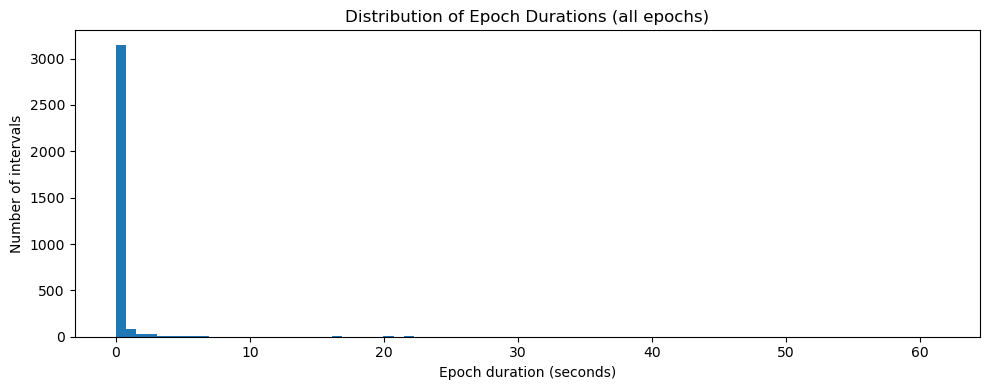

Epoch duration statistics:
count    3352.000000
mean        0.406164
std         2.393813
min         0.000453
25%         0.021827
50%         0.039837
75%         0.124521
max        61.384995
dtype: float64

Tag frequency (top 15 tags, flattened):
Type=Epoch                 2825
Epoch=1                    2666
EpochType=Sin Wave         2614
Amplitude=15               2075
Half Cycle=0                868
Half Cycle=1                865
Amplitude=14                515
EpochType=Square pulse      207
Type=Inserted Testpulse     196
Amplitude=0                 139
SubType=Baseline            128
Name=Baseline Chunk         115
Index=0                      78
ShortName=ST                 66
Type=Stimset                 66
Name: count, dtype: int64


In [6]:
import pandas as pd

if hasattr(nwb, 'epochs') and nwb.epochs is not None:
    epochs_df = nwb.epochs.to_dataframe().copy()
    durations = epochs_df['stop_time'] - epochs_df['start_time']
    plt.figure(figsize=(10, 4))
    plt.hist(durations, bins=80)
    plt.xlabel('Epoch duration (seconds)')
    plt.ylabel('Number of intervals')
    plt.title('Distribution of Epoch Durations (all epochs)')
    plt.tight_layout()
    plt.show()

    # Show descriptive statistics
    print('Epoch duration statistics:')
    print(durations.describe())
    print('\nTag frequency (top 15 tags, flattened):')
    # Flatten tags to individual strings then count
    all_tags = [tag for tags_list in epochs_df['tags'] for tag in tags_list]
    tag_counts = pd.Series(all_tags).value_counts().head(15)
    print(tag_counts)
else:
    print('No epochs table found in file.')

### Summary and Takeaways

- **Data richness:** Each session contains tens of sweeps, comprehensive protocol tagging, and spike detection.
- **Structure awareness:** Proper handling of timing and tagging is critical for correct downstream analysis.
- **Reanalysis:** Analysis can be scoped to particular epochs, stimulus types, or spike patterns.

---

## Next Steps
Thorough exploration of this Dandiset will enable you to:
- Extract and compare protocol-specific responses or features across subjects/sessions.
- Perform meta-analyses on cell type, physiological properties, and spike behaviors.
- Integrate with transcriptomic or morphological information (where available).

**For more interactive exploration:**  
Try [Neurosift](https://neurosift.app/nwb?dandisetId=001359&dandisetVersion=0.250401.1603) for quick browse and QC of NWB files.

---

_Notebook generated by AI. Please double-check results and code before using in critical analyses._